<a href="https://colab.research.google.com/github/4d5645/DeepLearningSchool/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3 style="text-align: center;"><b>Deep Learning School MIPT</b></h3>

<h3 style="text-align: center;"><b>Homework, advanced level, spring 2022
</b></h3>

# Metric

I use the standard ROC-AUC metric for the classification task.

# First part. Study

In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Loading data (2 points)
1) I look at random lines.

2) There're no NaN's in the dataframe, but there are spaces in the TotalSpent column. I change the type of values ​​in a column and replace spaces with zeros

In [124]:
from google.colab import drive
drive.mount('/content/gdrive')
train = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DLS/HW3/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DLS/HW3/test.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [125]:
# Numeric features
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Categorical Features
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [126]:
print(train.shape)

(5282, 20)


In [127]:
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [129]:
train.shape

(5282, 20)

In [130]:
v = []
for i in range(5282):
  v.append(train['TotalSpent'][i])
sum = 0
for j in range(len(v)):
  if v[j] == ' ':
    sum += 1
print (f'Amount of missing values: {sum}')

Amount of missing values: 9


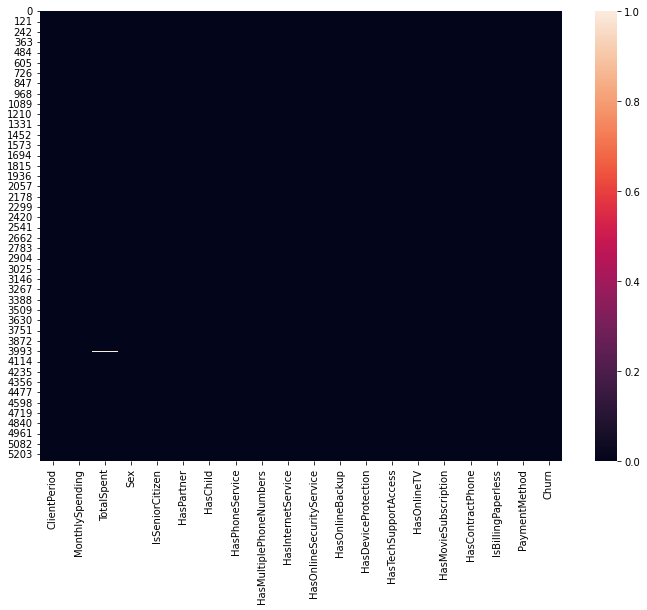

In [131]:
# It's usually convenient to use heatmap to visualize props, but this is not the best solution in this case. 
# I had to enlarge the picture
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27

sns.heatmap(train.replace(" ", np.nan).isna())

In [132]:
train['TotalSpent'] = train['TotalSpent'].replace(['', ' '], 0)
train['TotalSpent'] = train['TotalSpent'].astype('float64')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [133]:
test['TotalSpent'] = test['TotalSpent'].replace(['', ' '], 0)
test['TotalSpent'] = test['TotalSpent'].astype('float64')

## Data analysis (3 points)

1) For numerical features, I build boxplots. For categorical ones, I count the number of each value for each feature and build pie charts.

2) I build a pie chart for the target feature. 
 ### Conclusion - classes are not balanced

In [134]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=len(num_cols))
for i, var in enumerate(num_cols):
    fig.add_trace(go.Box(y=train[var], name=var), row=1, col=i+1)

fig.update_traces(boxpoints='all', jitter=.3)

In [135]:
print(train['Sex'].value_counts().index)

Index(['Male', 'Female'], dtype='object')


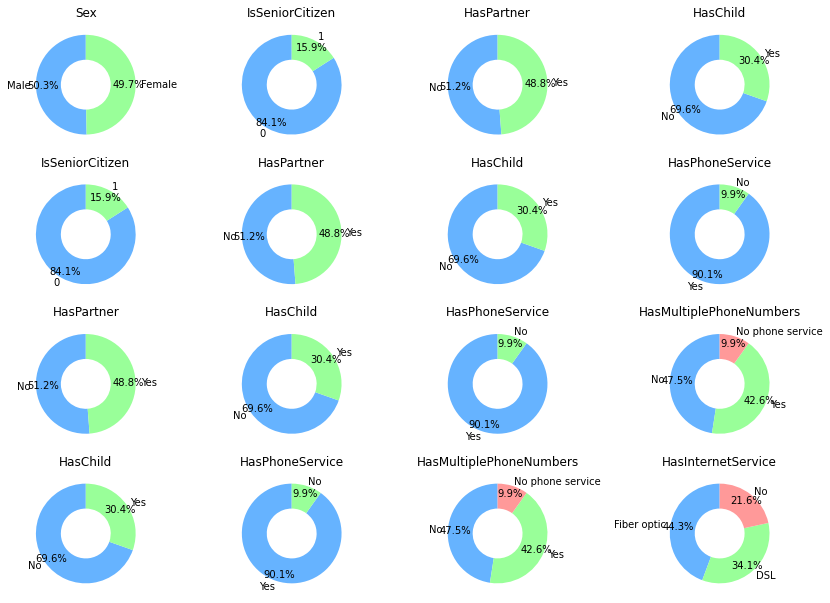

In [136]:
import plotly.express as px
from plotly.subplots import make_subplots
counts = []
labels = []
for i in range(len(cat_cols)):
  counts.append(train[cat_cols[i]].value_counts().values)
  labels.append(train[cat_cols[i]].value_counts().index)

colors = ['#66b3ff', '#99ff99','#ff9999']
fig, axs = plt.subplots(nrows=4, ncols=4, constrained_layout=True)
for i in range(4):
  for j in range(4):
    axs[i,j].set_title(cat_cols[i+j])
    axs[i, j].pie(counts[i+j], labels=labels[i+j], colors=colors,autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.5))

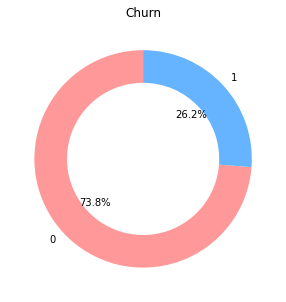

In [137]:
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(train['Churn'].value_counts().values, colors = colors, labels=train['Churn'].value_counts().index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
ax1.set_title('Churn')
plt.show()

## Linear models (3 points)

1) I do data processing so that LogisticRegression can be applied to them. I normalize numerical features, and encode categorical features using one-hot-encoding

2) I collect a pipeline from preprocessing and logistic regression. Submit data to GridSearchCV. The best parameters're again fed into the classifier. To evaluate the model, I use cross-validation and roc-auc

### The best roc-auc result: 0.87 with parameters: C=100, penalty=l1, solver=liblinear

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
from sklearn.model_selection import cross_val_score
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(C=100, penalty='l1', solver='liblinear'))]
)

res = cross_val_score(clf, train[feature_cols], train[target_col], cv=10, scoring='roc_auc')
print(f'The best roc-auc result: {round(sorted(res)[len(res)-1], 2)} with parameters: C=100, penalty=l1, solver=liblinear')

The best roc-auc result: 0.87 with parameters: C=100, penalty=l1, solver=liblinear


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
parameters = {
    'classifier__C':[100, 10, 1, 0.1, 0.01, 0.001],
    "classifier__penalty":['none', 'l1', 'l2', 'elasticnet'],
    "classifier__solver":['newton-cg', 'lbfgs', 'liblinear'],
    }
grid = GridSearchCV(clf, parameters, scoring='roc_auc')
grid.fit(train[feature_cols], train[target_col])
print(f'Best parameters for Logistic Regr: {grid.best_params_}')

Best parameters for Logistic Regr: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


## Gradient boosting (2 points)

1)I divide the sample by train/valid and catboost with standard parameters.

2) Then I test different values ​​of the input parameters and choose the best ones for roc-auc

In [ ]:
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(train[feature_cols], train[target_col], test_size=0.2, random_state=42)
# Initialize CatBoostRegressor
model_test = CatBoostClassifier()
# Fit model
model_test.fit(X_train, y_train, cat_features=cat_cols)

In [162]:
print(f'Roc-auc with standart parameters: {roc_auc_score(y_test, model_test.predict_proba(X_test)[:,1])}')

Roc-auc with standart parameters: 0.823387759625419


In [ ]:
# Initialize CatBoostRegressor
model_cat = CatBoostClassifier(iterations=1000,
                          learning_rate=0.01,
                          depth=15,
                          eval_metric='AUC')
# Fit model
model_cat.fit(X_train, y_train, cat_features=cat_cols)

In [165]:
print(f'Roc-auc with my parameters: {roc_auc_score(y_test, model_cat.predict_proba(X_test)[:,1])}')

Roc-auc with my parameters: 0.802719313637665


# Predictions

In [ ]:
# Choose the best standard logistic regression model with my parameters
best_model = clf

In [ ]:
best_model.fit(train[feature_cols], train[target_col])
submission = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DLS/HW3/submission.csv', index_col='Id')
submission['Churn'] = best_model.predict_proba(test)[:,1]
submission.to_csv('/content/gdrive/MyDrive/Colab Notebooks/DLS/HW3/my_submission.csv')


## Final score from Kaggle: 0.84583
Standard logistic regression model with my parameters